In [311]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

# Part 1

The dataset I have chosen is from Kaggle, https://www.kaggle.com/quantbruce/real-estate-price-prediction, 
and the learning I am interested in is the effects of different variables on real estate prices.
It is based on 1 years worth of data, from 2012-2013, and it details real estate pricing from a district in Taiwan. 
The input variables are the date of transaction, the age of the house, distance to the nearest MRT station, 
the number of convenience stores, and the geographical location of latitude and longitude. 
The target variable is Y, which is the house price.

In [312]:
df = pd.read_csv("dataset.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.91700,32.00000,84.87882,10,24.98298,121.54024,37.90000
1,2,2012.91700,19.50000,306.59470,9,24.98034,121.53951,42.20000
2,3,2013.58300,13.30000,561.98450,5,24.98746,121.54391,47.30000
3,4,2013.50000,13.30000,561.98450,5,24.98746,121.54391,54.80000
4,5,2012.83300,5.00000,390.56840,5,24.97937,121.54245,43.10000


In [313]:
df.columns=['No', 'X1', 'X2', 'X3','X4', 'X5', 'X6', 'Y']
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.91700,32.00000,84.87882,10,24.98298,121.54024,37.90000
1,2,2012.91700,19.50000,306.59470,9,24.98034,121.53951,42.20000
2,3,2013.58300,13.30000,561.98450,5,24.98746,121.54391,47.30000
3,4,2013.50000,13.30000,561.98450,5,24.98746,121.54391,54.80000
4,5,2012.83300,5.00000,390.56840,5,24.97937,121.54245,43.10000


<AxesSubplot:>

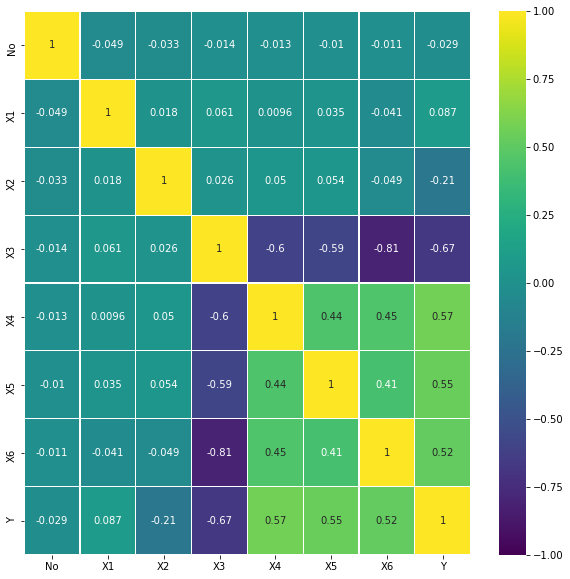

In [314]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

I chose to use a heatmap for initial exploratory data analysis, because it is easy to interpret the numbers to 
understand the correlation between the input variables and the target variable.
The heatmap ranges from -1 to +1, and if the number is closer to 1, that means there is a stronger correlation. 
If it is closer to -1, then there is a negative correlation, so as one variable increases, the other decreases, 
and if it is closer to +1, there is a positive correlation. Based on this heatmap, we can understand the correlation 
between each input variable with Y. Going off this, it seems that X3 has the strongest negative correlation, 
at -0.67 and X4 has the strongest positive correlation, at 0.57.

Logically, this makes sense because X3 represents the distance to an MRT station, so the shorter the distance, 
the more convenient the location of the house, so the price for the house increases. Similarly, X4 represents the 
number of convenience stores near the house, so with a greater number of stores, the worth of the house will also 
increase. 

If we examine the graphical plots below, we can see a clearer visual representation of the effect of each input 
variable on Y. It seems that X1, does not have a very clear linear correlation to Y, but X3, X4, X5 and X6 
seem to have a more linear relationship.

<AxesSubplot:xlabel='X1'>

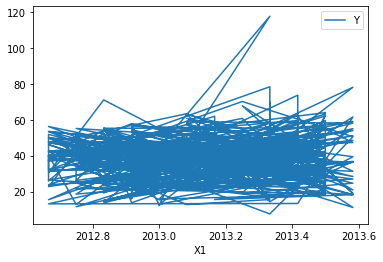

In [352]:
df.plot(y='Y',x='X1')

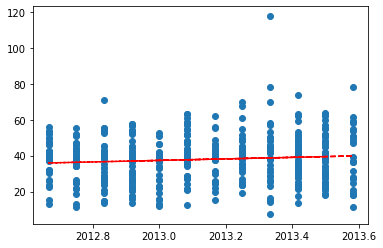

In [359]:
data = df[['X1', 'Y']]
x = data['X1']
y = data['Y']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

<AxesSubplot:xlabel='X2'>

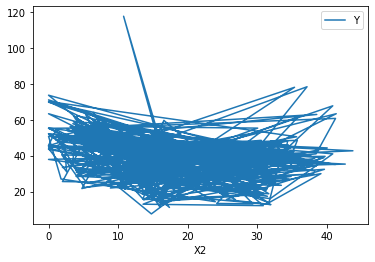

In [353]:
df.plot(y='Y',x='X2')

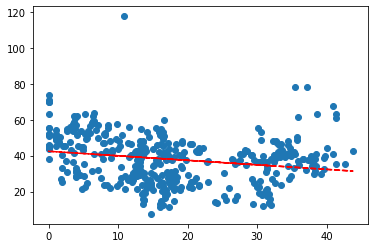

In [360]:
data = df[['X2', 'Y']]
x = data['X2']
y = data['Y']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

<AxesSubplot:xlabel='X3'>

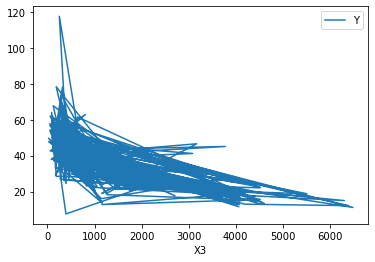

In [354]:
df.plot(y='Y',x='X3')

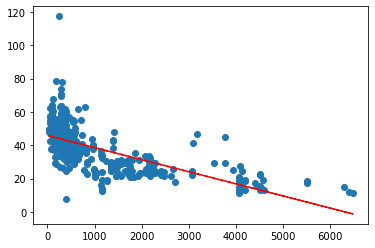

In [361]:
data = df[['X3', 'Y']]
x = data['X3']
y = data['Y']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

<AxesSubplot:xlabel='X4'>

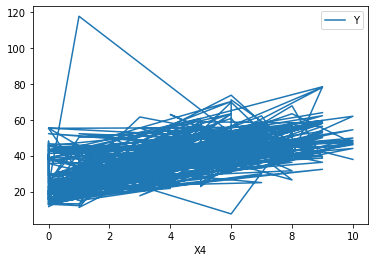

In [355]:
df.plot(y='Y',x='X4')

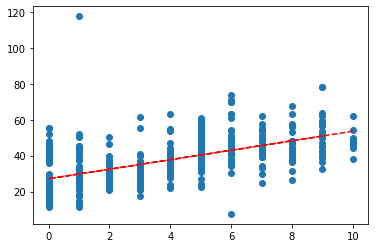

In [362]:
data = df[['X4', 'Y']]
x = data['X4']
y = data['Y']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

<AxesSubplot:xlabel='X5'>

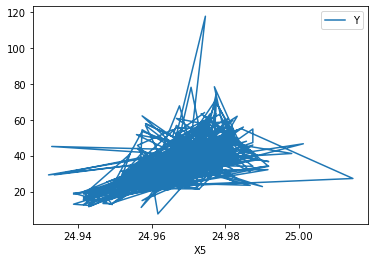

In [356]:
df.plot(y='Y',x='X5')

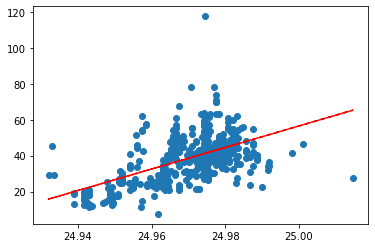

In [363]:
data = df[['X5', 'Y']]
x = data['X5']
y = data['Y']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

<AxesSubplot:xlabel='X6'>

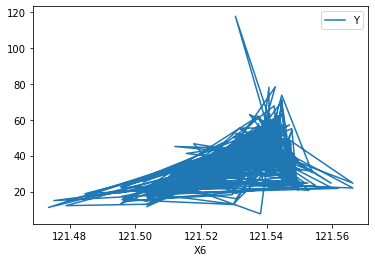

In [357]:
df.plot(y='Y',x='X6')

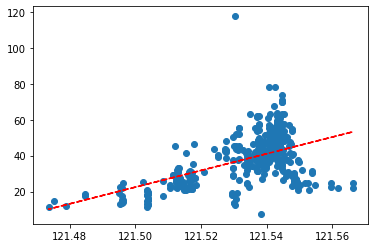

In [364]:
data = df[['X6', 'Y']]
x = data['X6']
y = data['Y']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

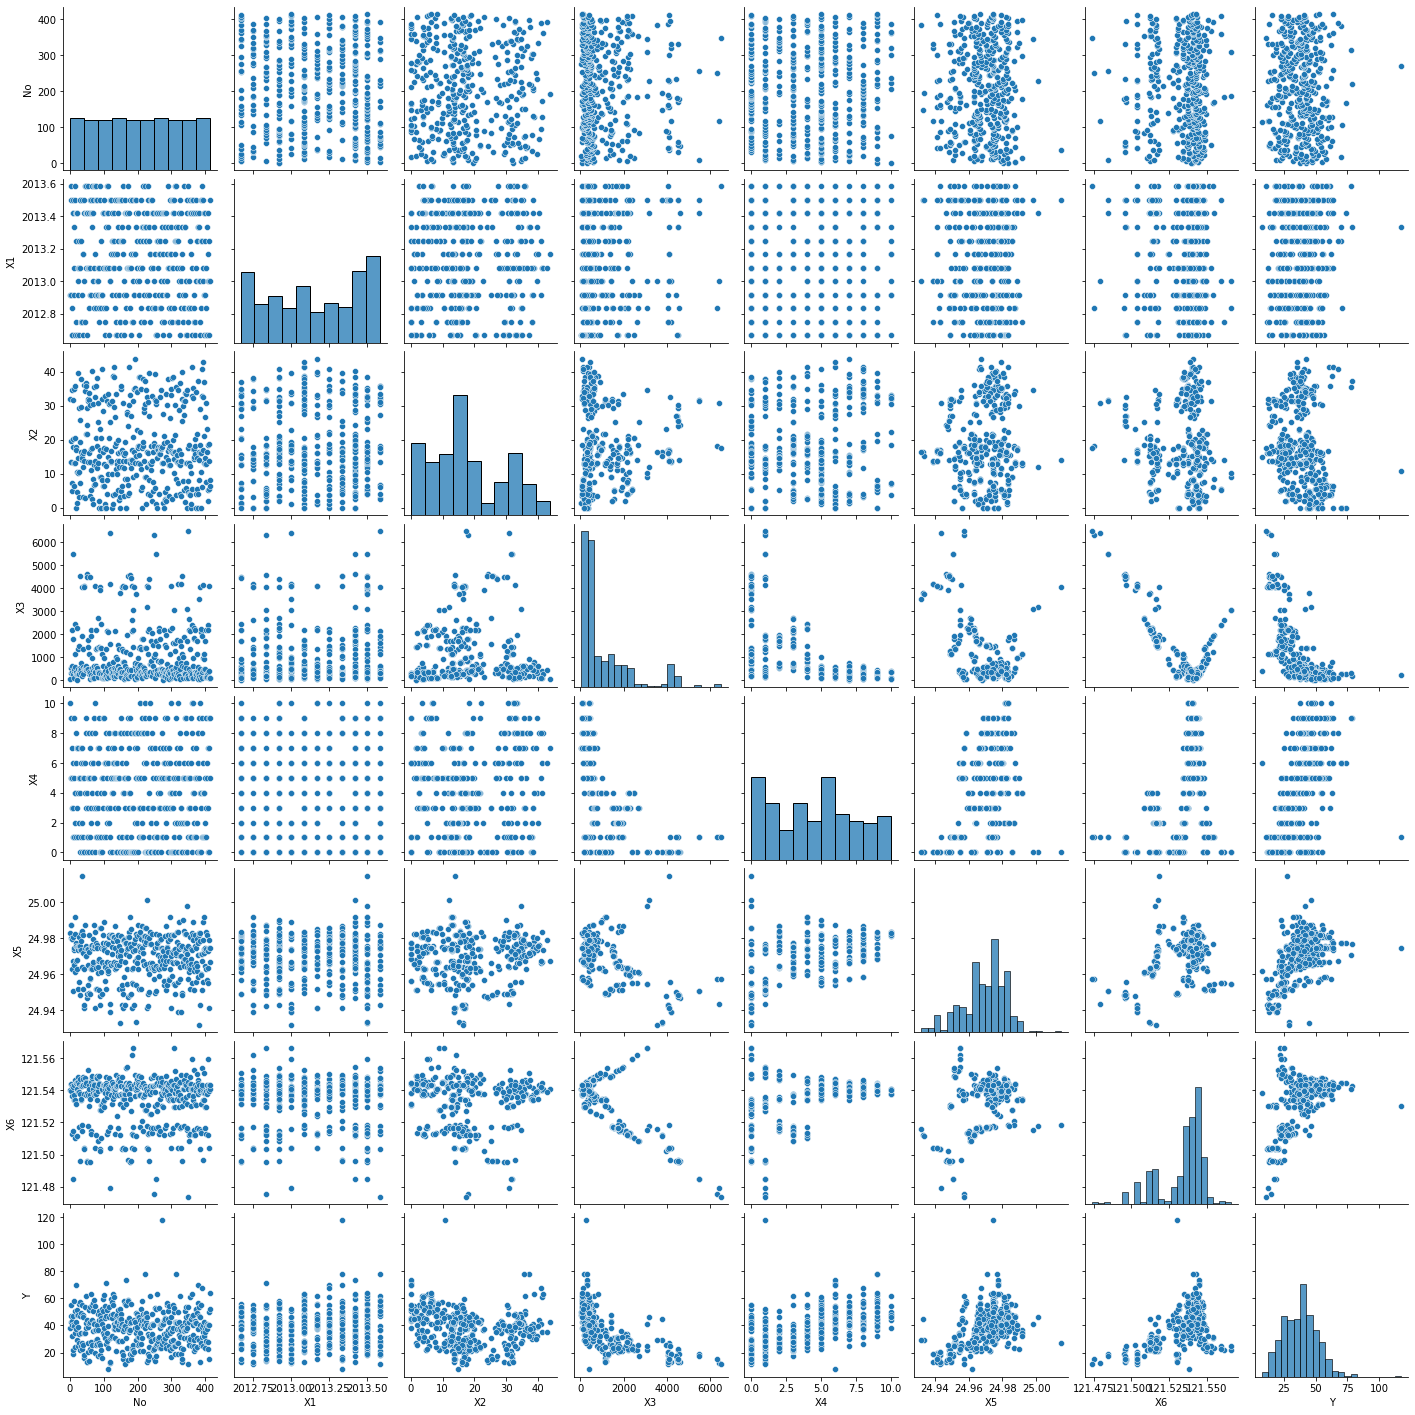

In [315]:
sns.pairplot(df)

In [316]:
df.isnull().sum()

No    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

# Part 2

In [318]:
Y=df["Y"]
X=df[[ "X2", "X3", "X4", 'X5', 'X6']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 372
Testing Data Count: 42


In [319]:
#Model 1, with every variable included.

In [320]:
results = smf.ols('Y ~ X2 + X3 + X4 + X5 + X6 ', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           9.34e-73
Time:                        22:04:33   Log-Likelihood:                -1492.4
No. Observations:                 414   AIC:                             2997.
Df Residuals:                     408   BIC:                             3021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4945.5951   6211.157     -0.796      0.4

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg=LinearRegression()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred))

83.13864290674074


In [322]:
#Model 2, with X6 dropped because the p-value is greater than 0.05, so it is insignificant.
X2=df[[ "X2", "X3", "X4", 'X5']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count:', X2_train.shape[0])
print('Testing Data Count::', X2_test.shape[0])

Training Data Count: 372
Testing Data Count:: 42


In [323]:
results2 = smf.ols('Y ~ X2 + X3 + X4 + X5', data=df).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     136.2
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           7.60e-74
Time:                        22:04:44   Log-Likelihood:                -1492.5
No. Observations:                 414   AIC:                             2995.
Df Residuals:                     409   BIC:                             3015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5916.0065   1112.732     -5.317      0.0

In [324]:
linreg=LinearRegression()
linreg.fit(X2_train, y2_train)
y2_pred=linreg.predict(X2_train)
print(metrics.mean_squared_error(y2_train, y2_pred))

83.15449975346846


In [325]:
#Model 3, univariate model with only X3, because I think it is the best predictor, 
#as it had the highest correlation in the heatmap.
X3=df[["X3"]]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count:', X3_train.shape[0])
print('Testing Data Count::', X3_test.shape[0])

Training Data Count: 372
Testing Data Count:: 42


In [326]:
results3 = smf.ols('Y ~ X3', data=df).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.64e-56
Time:                        22:04:54   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8514      0.653     70.258      0.0

In [327]:
linreg=LinearRegression()
linreg.fit(X3_train, y3_train)
y3_pred=linreg.predict(X3_train)
print(metrics.mean_squared_error(y3_train, y3_pred))

104.49190336679048


In [328]:
# Model 4 - Create an interaction term with x3 and x4 because x4 (# of convenience stores) 
#might depend on x3 (distance to MRT station). With less distance to MRT station, the house area might be more 
#populated, and therefore might have a higher number of convenience stores.
df['X7'] = df['X3']*df['X4'] 
df.head()

,No,X1,X2,X3,X4,X5,X6,Y,X7
0,1,2012.91700,32.00000,84.87882,10,24.98298,121.54024,37.90000,848.78820
1,2,2012.91700,19.50000,306.59470,9,24.98034,121.53951,42.20000,2759.35230
2,3,2013.58300,13.30000,561.98450,5,24.98746,121.54391,47.30000,2809.92250
3,4,2013.50000,13.30000,561.98450,5,24.98746,121.54391,54.80000,2809.92250
4,5,2012.83300,5.00000,390.56840,5,24.97937,121.54245,43.10000,1952.84200


In [329]:
X4=df[[ "X2", "X3", "X4", 'X5', 'X7']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count:', X4_train.shape[0])
print('Testing Data Count::', X4_test.shape[0])

Training Data Count: 372
Testing Data Count:: 42


In [331]:
results4 = smf.ols('Y ~ X2 + X3 + X4 + X5 +X7', data=df).fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.02e-83
Time:                        22:06:28   Log-Likelihood:                -1467.4
No. Observations:                 414   AIC:                             2947.
Df Residuals:                     408   BIC:                             2971.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7656.0700   1075.821     -7.116      0.0

In [332]:
linreg=LinearRegression()
linreg.fit(X4_train, y4_train)
y4_pred=linreg.predict(X4_train)
print(metrics.mean_squared_error(y4_train, y4_pred))

73.1669866064071


In [333]:
#Model 5, trying polynomial regression for X3 because visually, it seems to be non-linear.


In [335]:
df['X3_sqrd']=np.square(df['X3'])
df['X3_cube']=np.power(df['X3'], 3) 
df.head()

,No,X1,X2,X3,X4,X5,X6,Y,X7,X3_sqrd,X3_cube
0,1,2012.91700,32.00000,84.87882,10,24.98298,121.54024,37.90000,848.78820,7204.41408,611502.16629
1,2,2012.91700,19.50000,306.59470,9,24.98034,121.53951,42.20000,2759.35230,94000.31007,28819996.86523
2,3,2013.58300,13.30000,561.98450,5,24.98746,121.54391,47.30000,2809.92250,315826.57824,177489641.65906
3,4,2013.50000,13.30000,561.98450,5,24.98746,121.54391,54.80000,2809.92250,315826.57824,177489641.65906
4,5,2012.83300,5.00000,390.56840,5,24.97937,121.54245,43.10000,1952.84200,152543.67508,59578739.10555


In [336]:
X5=df[[ "X3_sqrd", "X3_cube"]]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count:', X4_train.shape[0])
print('Testing Data Count::', X4_test.shape[0])

Training Data Count: 372
Testing Data Count:: 42


In [337]:
results5 = smf.ols('Y ~ X3_sqrd + X3_cube', data=df).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.13e-47
Time:                        22:07:14   Log-Likelihood:                -1560.1
No. Observations:                 414   AIC:                             3126.
Df Residuals:                     411   BIC:                             3138.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.5047      0.620     70.153      0.0

In [338]:
linreg=LinearRegression()
linreg.fit(X5_train, y5_train)
y5_pred=linreg.predict(X5_train)
print(metrics.mean_squared_error(y5_train, y5_pred))

113.55218072094557


Model 4 seems to be the best one based on the adjusted r-squared. It has the highest r-squared, which means 61% of 
the data fits the model. Moreover, when comparing all the in-sample MSE's for each of these models, Model 4 has the 
lowest MSE score, at 73.16. Also, when comparing the p-values, it is clear that all the variables are significant, 
and the AIC and BIC scores for Model 4 are lower than Models 1,2,3,5.

# PART 3

In [339]:
X6=df[[ "X1","X2", "X3", "X4", 'X5', 'X6', 'X7', "X3_sqrd", "X3_cube"]]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count:', X6_train.shape[0])
print('Testing Data Count::', X6_test.shape[0])

Training Data Count: 372
Testing Data Count:: 42


In [340]:
#Using code from https://www.datasklr.com/ols-least-squares-regression/variable-selection
def backward_regression(X, y,initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X6_train, y6_train)

Drop  with p-value 
Drop  with p-value 
Drop  with p-value 


['X1', 'X2', 'X3', 'X5', 'X3_sqrd', 'X3_cube']

In [341]:
#Comparing with best OLS model. The best OLS model was Model 4, as selected from part 2.
X7=df[['X1', 'X2', 'X3', 'X5', 'X3_sqrd', 'X3_cube']]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, Y, test_size = 0.1, random_state = 1706)
print('Training Data Count:', X7_train.shape[0])
print('Testing Data Count::', X7_test.shape[0])

Training Data Count: 372
Testing Data Count:: 42


In [342]:
results7 = smf.ols('Y ~ X1 + X2 + X3 + X5 + X3_sqrd + X3_cube', data=df).fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           8.54e-94
Time:                        22:08:37   Log-Likelihood:                -1440.4
No. Observations:                 414   AIC:                             2895.
Df Residuals:                     407   BIC:                             2923.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.049e+04   2897.089     -7.072      0.0

In [343]:
linreg=LinearRegression()
linreg.fit(X7_train, y7_train)
y7_pred=linreg.predict(X7_test)
print(metrics.mean_squared_error(y7_test, y7_pred))

36.49324534237622


Comparing the R2 values, this optimal model selected by backwards step is better than the best model from part 2,
Model 4, because the adjusted r2 is 0.662 vs 0.615. This means the 66% of the data fit the model compared to 61% from 
model 4. Additionally, when comparing the in-sample MSE scores, this model has a much lower score, at 36.49 compared 
with 73.16.

# PART 4

In [345]:
df = df.reindex(columns=['No','X1','X2','X3','X4','X5','X6','X7','X3_sqrd','X3_cube','Y'])
df

,No,X1,X2,X3,X4,X5,X6,X7,X3_sqrd,X3_cube,Y
0,1,2012.91700,32.00000,84.87882,10,24.98298,121.54024,848.78820,7204.41408,611502.16629,37.90000
1,2,2012.91700,19.50000,306.59470,9,24.98034,121.53951,2759.35230,94000.31007,28819996.86523,42.20000
2,3,2013.58300,13.30000,561.98450,5,24.98746,121.54391,2809.92250,315826.57824,177489641.65906,47.30000
3,4,2013.50000,13.30000,561.98450,5,24.98746,121.54391,2809.92250,315826.57824,177489641.65906,54.80000
4,5,2012.83300,5.00000,390.56840,5,24.97937,121.54245,1952.84200,152543.67508,59578739.10555,43.10000
...,...,...,...,...,...,...,...,...,...,...,...
409,410,2013.00000,13.70000,4082.01500,0,24.94155,121.50381,0.00000,16662846.46022,68017989193.33535,15.40000
410,411,2012.66700,5.60000,90.45606,9,24.97433,121.54310,814.10454,8182.29879,740138.51035,50.00000
411,412,2013.25000,18.80000,390.96960,7,24.97923,121.53986,2736.78720,152857.22812,59762529.33681,40.60000
412,413,2013.00000,8.10000,104.81010,5,24.96674,121.54067,524.05050,10985.15706,1151355.41018,52.50000


In [346]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV


In [347]:
X8=df[['X1', 'X2', 'X3', 'X5', 'X3_sqrd', 'X3_cube']]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, Y, test_size = 0.1, random_state = 1706)
model = Ridge(alpha=5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X8_train, y8_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MSE: 75.284 (56.233)


# Part 5

In [368]:
linreg=LinearRegression()
linreg.fit(X4_train, y4_train)
y4_pred=linreg.predict(X4_test)
print(np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

6.662580710108505


In [369]:
linreg=LinearRegression()
linreg.fit(X7_train, y7_train)
y7_pred=linreg.predict(X7_test)
print(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)))

6.040963941489489


In [370]:
ridge = Ridge(alpha=5, normalize=True)
ridge.fit(X8_train,y8_train)
y8_pred = ridge.predict(X8_test)
rmse = np.sqrt(mean_squared_error(y8_test,y8_pred))
print(rmse)

9.258873784340045


Comparing the out of sample MSe for each of the 3 selected models, it is clear that Model 7, using the backwards 
stepwise selection was a much better model than the other two. With the RMSE being just 6.04, this means there was a 
much smaller difference between the estimated values and the actual values. In general, this model was very effective 
in predicting Y, because the RMSE measures how accurately the model's predictions are. So with an RMSE as close to 0 
as possible, that means the model fit the data well, and was able to make good predictions.

So we ran the first 2 models with an OLS regression, and the last model with a Ridge regression. It is interesting 
to see that both OLS models performed better than the Ridge regression, because the data suffered from 
multicollinearity, so ridge regression should have been more effective. However, this could just mean that the 
underlying relationship between the input variables and the target variable is linear, which is why OLS performed 
better.
